# Counting museums in China

In this section we'll reproduce the graphics from [this piece here](https://datanews.caixin.com/mobile/museum/), where Caixin does a per-capita analysis of the museums in China.

<p class="reading-options">
  <a class="btn" href="/caixin-museum-word-count/chinese-museums-per-capita-analysis">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/caixin-museum-word-count/notebooks/Chinese museums per capita analysis.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/caixin-museum-word-count/notebooks/Chinese museums per capita analysis.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

### Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.
* **museums-cleaned.csv:** cleaned museums - A cleaned list of museums
* **population-cleaned.csv:** population data - Cleaned population data with column names matching museum data


In [ ]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/caixin-museum-word-count/data/museums-cleaned.csv -P data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/caixin-museum-word-count/data/population-cleaned.csv -P data

## Setup

We'll import pandas as usual, but we'll also need to **do some special matplotlib setup**. This allows us to **have graphs with Chinese characters** - if we don't, every time we graph we'll get a lot of errors and the text won't look right.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# So Chinese characters can appear correctly
plt.rcParams['font.sans-serif'] = ['SimHei', 'SimSun', 'Microsoft YaHei New', 'Microsoft YaHei', 'Arial Unicode MS']

%matplotlib inline

## Importing our data

We'll be using the data we previously cleaned.

In [3]:
df = pd.read_csv("data/museums-cleaned.csv")
df.head()

,博物馆名称,博物馆性质,质量等级,是否免费开放,地址,region
0,故宫博物院,文物,一级,否,东城区景山前街4号,北京市
1,中国国家博物馆,文物,一级,是,北京市东城区东长安街16号,北京市
2,中国人民革命军事博物馆,行业,一级,是,海淀区复兴路9号,北京市
3,北京鲁迅博物馆(北京新文化运动\r纪念馆),文物,一级,是,阜成门内宫门口二条19号\r东城区五四大街29号,北京市
4,中国地质博物馆,行业,一级,否,西城区西四羊肉胡同15号,北京市


How many museums do we have?

In [4]:
df.shape

(4469, 6)

Great. 4469 rows, 6 columns. 4471 museums, 6 pieces of data about each.

## Counting values

How many museums are in each province?

In [5]:
df.region.value_counts()

山东省         339
浙江省         277
江苏省         274
河南省         265
广东省         252
陕西省         236
四川省         216
湖北省         197
黑龙江省        193
内蒙古自治区      192
甘肃省         183
安徽省         182
北京市         146
江西省         137
湖南省         129
山西省         121
上海市         116
福建省         111
吉林          104
云南省         101
新疆维吾尔自治区    100
广西壮族自治区      99
河北省          97
辽宁省          93
贵州省          81
重庆市          69
天津市          56
宁夏回族自治区      39
青海省          32
海南省          24
西藏自治区         8
Name: region, dtype: int64

Honestly we use `value_counts()` to count _everything_ in _almost every column_.

In [6]:
df.博物馆性质.value_counts()

文物     2701
非国有    1058
行业      710
Name: 博物馆性质, dtype: int64

In [7]:
df.质量等级.value_counts()

无级别    3772
三级      393
二级      212
一级       92
Name: 质量等级, dtype: int64

In [8]:
df.是否免费开放.value_counts()

是    3844
否     625
Name: 是否免费开放, dtype: int64

## Crosstab for combinations

What if we want to see how many of a _combination_? `pd.crosstab` to the rescue!

In [9]:
pd.crosstab(df.博物馆性质, df.是否免费开放)

是否免费开放,否,是
博物馆性质,,
文物,313,2388
行业,160,550
非国有,152,906


In [10]:
pd.crosstab(df.博物馆性质, df.是否免费开放)

是否免费开放,否,是
博物馆性质,,
文物,313,2388
行业,160,550
非国有,152,906


In [11]:
pd.crosstab(df.region, df.是否免费开放)

是否免费开放,否,是
region,,
上海市,22,94
云南省,8,93
内蒙古自治区,1,191
北京市,77,69
吉林,15,89
四川省,131,85
天津市,22,34
宁夏回族自治区,10,29
安徽省,3,179


## Percentage crosstabs

Instead of pure counts, sometimes you want crosstab to return a percentage. In this case, we'll just pass `normalize='index'` to have each column be a percentage of the row.

In [12]:
pd.crosstab(df.region, df.博物馆性质, normalize='index')

博物馆性质,文物,行业,非国有
region,,,
上海市,0.370690,0.387931,0.241379
云南省,0.762376,0.148515,0.089109
内蒙古自治区,0.614583,0.119792,0.265625
北京市,0.363014,0.479452,0.157534
吉林,0.644231,0.221154,0.134615
四川省,0.675926,0.069444,0.254630
天津市,0.321429,0.375000,0.303571
宁夏回族自治区,0.487179,0.333333,0.179487
安徽省,0.582418,0.115385,0.302198


We can even graph it...

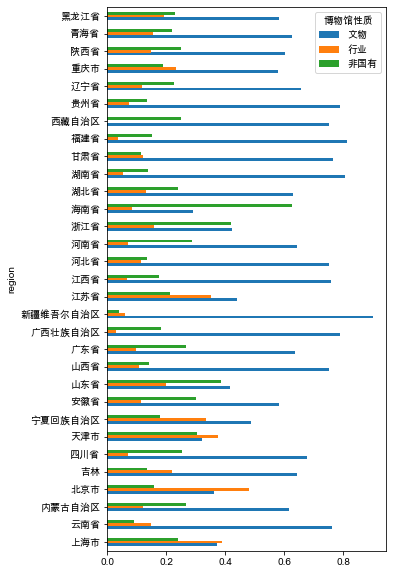

In [13]:
pd.crosstab(df.region, df.博物馆性质, normalize='index').plot(kind='barh', figsize=(5,10))

...but it looks much better stacked! We can do this because **each row adds up to 100%.**

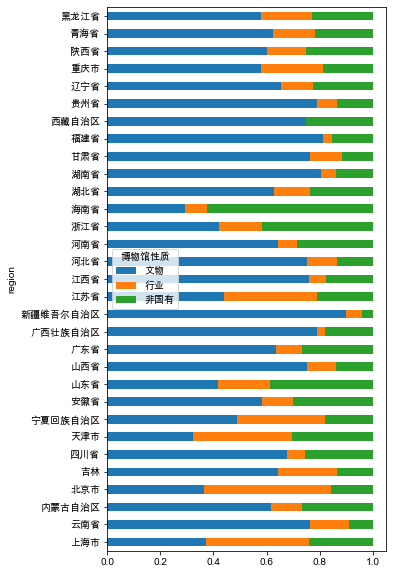

In [14]:
pd.crosstab(df.region, df.博物馆性质, normalize='index').plot(kind='barh', figsize=(5,10), stacked=True)

## Per capita adjustments

To judge the number of museums per person (or the number of people per museum), we'll need to combine the province counts with population counts.

In [15]:
regions = df.region.value_counts().to_frame('museums').reset_index()
regions.head()

,index,museums
0,山东省,339
1,浙江省,277
2,江苏省,274
3,河南省,265
4,广东省,252


This dataset has been cleaned a little bit to make sure the columns match.

In [16]:
pop = pd.read_csv("data/population-cleaned.csv")
pop.head()

,ISO,Province,Chinese,Population
0,CN-AH,Anhui Province,安徽省,59500510
1,CN-BJ,Beijing Municipality,北京市,19612368
2,CN-CQ,Chongqing Municipality,重庆市,28846170
3,CN-FJ,Fujian Province[e],福建省,36894216
4,CN-GD,Guangdong Province,广东省,104303132


We'll merge on the Chinese name for each region.

In [17]:
merged = regions.merge(pop, right_on='Chinese', left_on='index')
merged

,index,museums,ISO,Province,Chinese,Population
0,山东省,339,CN-SD,Shandong Province,山东省,95793065
1,浙江省,277,CN-ZJ,Zhejiang Province,浙江省,54426891
2,江苏省,274,CN-JS,Jiangsu Province,江苏省,78659903
3,河南省,265,CN-HA,Henan Province,河南省,94023567
4,广东省,252,CN-GD,Guangdong Province,广东省,104303132
5,陕西省,236,CN-SN,Shaanxi Province,陕西省,37327378
6,四川省,216,CN-SC,Sichuan Province,四川省,80418200
7,湖北省,197,CN-HB,Hubei Province,湖北省,57237740
8,黑龙江省,193,CN-HL,Heilongjiang Province,黑龙江省,38312224
9,甘肃省,183,CN-GS,Gansu Province,甘肃省,25575254


And then perform some small calculations to build two new columns relating the number of people to the number of museums.

In [18]:
merged['people_per_museum'] = merged.Population / merged.museums
merged['museums_per_1m'] = merged.museums / merged.Population * 1000000
merged.head()

,index,museums,ISO,Province,Chinese,Population,people_per_museum,museums_per_1m
0,山东省,339,CN-SD,Shandong Province,山东省,95793065,282575.412979,3.538878
1,浙江省,277,CN-ZJ,Zhejiang Province,浙江省,54426891,196486.971119,5.089396
2,江苏省,274,CN-JS,Jiangsu Province,江苏省,78659903,287079.937956,3.483350
3,河南省,265,CN-HA,Henan Province,河南省,94023567,354805.913208,2.818442
4,广东省,252,CN-GD,Guangdong Province,广东省,104303132,413901.317460,2.416035


### Viewing our results

We only looked at the first five above because **we're probably interested in the sorted version**.

In [110]:
merged.sort_values(by='museums_per_1m', ascending=False)

,index,museums,ISO,Province,Chinese,Population,people_per_museum,museums_per_1m
11,北京市,146,CN-BJ,Beijing Municipality,北京市,19612368,134331.287671,7.444282
9,甘肃省,183,CN-GS,Gansu Province,甘肃省,25575254,139755.486339,7.155354
5,陕西省,236,CN-SN,Shaanxi Province,陕西省,37327378,158166.855932,6.322437
25,宁夏回族自治区,39,CN-NX,Ningxia Hui Autonomous Region,宁夏回族自治区,6301350,161573.076923,6.189150
26,青海省,32,CN-QH,Qinghai Province,青海省,5626722,175835.062500,5.687148
1,浙江省,277,CN-ZJ,Zhejiang Province,浙江省,54426891,196486.971119,5.089396
15,上海市,116,CN-SH,Shanghai Municipality,上海市,23019148,198440.931034,5.039283
8,黑龙江省,193,CN-HL,Heilongjiang Province,黑龙江省,38312224,198508.932642,5.037557
18,新疆维吾尔自治区,100,CN-XJ,Xinjiang Uyghur Autonomous Region,新疆维吾尔自治区,21813334,218133.340000,4.584352
24,天津市,56,CN-TJ,Tianjin Municipality,天津市,12938224,231039.714286,4.328260


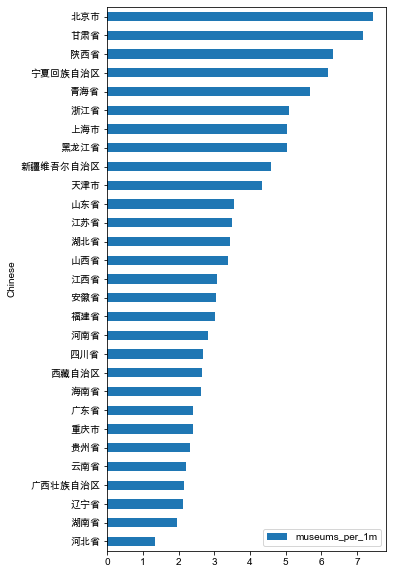

In [111]:
merged.sort_values(by='museums_per_1m').plot(x='Chinese', y='museums_per_1m', kind='barh', figsize=(5,10))

The [actual Caixin piece graphic](https://datanews.caixin.com/mobile/museum/) gives you the people per museum, and draws a line at 300,000 people.

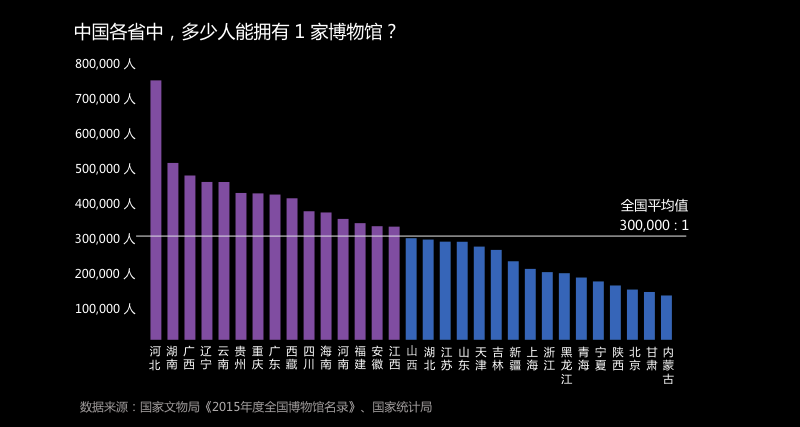

We can easily reproduce that one with matplotlib. If your characters are showing up weird, make sure you ran the font-setting code up at the top!

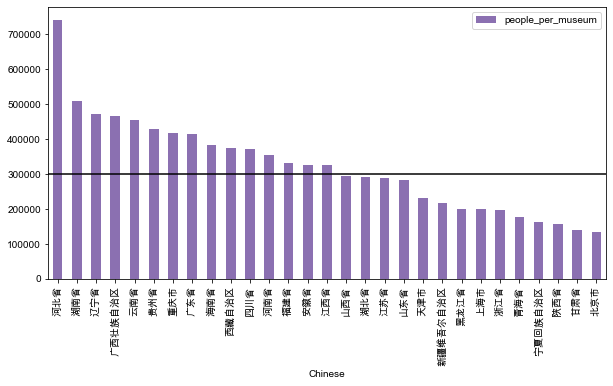

In [68]:
merged.sort_values(by='people_per_museum', ascending=False).plot(x='Chinese', y='people_per_museum', kind='bar', figsize=(10, 5), color='#8b70b1')

plt.axhline(300000, color='black')

## Discussion topics

Why do we look at per capita museums in each province instead of the raw numbers?

When you talk about a "bigger" province, you could talk about either popular _or_ how physically large the area is. Why does per capita make more sense here?

宁夏回族自治区 and 青海省	have a large number of museums, per-capita, but not very musuems overall (around 40, compared to 100-250 in the other high per-capita museums). Does it seem reasonable that they're listed between plces like 陕西省 and 陕西省 which both have over 200 museums each?

We calculated two numbers for this data - people per museum, and museums per person. What are the different feelings associated with each angle? How would the chart look different if it were presented as museums per person instead of people per museum?